In [1]:
#Import

import pandas as pd
import numpy as np
import os

import sns

raw_data_dir = r"E:\AIML_Project\data\raw"
processed_dir = r"E:\AIML_Project\data\processed"

In [2]:
#Loading the dataset

df = pd.read_csv("E:/AIML_Project/data/raw/adult.data", header=None)

display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Defining the column names

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

print("Column names defined: ", columns)
print(f"Total columns: {len(columns)}")

Column names defined:  ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
Total columns: 15


In [4]:
#Path to train file
train_path = os.path.join(raw_data_dir, 'adult.data')
df_train = pd.read_csv(train_path, names=columns, header=None, skipinitialspace=True)

#Dsiplaying basic info
print("Training data shape:", df_train.shape)
print("\nFirst 5 rows:")
print(df_train.head())
print("\nColumn names:")
print(df_train.columns.tolist())

Training data shape: (32561, 15)

First 5 rows:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=

In [5]:
# Path to test file
test_path = os.path.join(raw_data_dir, 'adult.test')
df_test = pd.read_csv(test_path, names=columns, header=None, skiprows=1, skipinitialspace=True)

# The last column in test might have a trailing '.' — clean it
df_test['income'] = df_test['income'].str.rstrip('.')

# Display basic info
print("Test data shape:", df_test.shape)
print("\nFirst 5 rows:")
print(df_test.head())
print("\nColumn names:")
print(df_test.columns.tolist())

Test data shape: (16281, 15)

First 5 rows:
   age  workclass  fnlwgt     education  education_num      marital_status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital_gain  capital_loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hou

In [6]:
# Quick checks
print("Train info:")
print(df_train.info())
print("\nTest info:")
print(df_test.info())

# Check for any mismatches
assert df_train.columns.equals(df_test.columns), "Column names mismatch between train/test!"
print("\nColumn names consistent across train/test.")

# Save preprocessed CSVs for next steps (optional)
processed_dir = r"E:\AIML_Project\data\processed"
os.makedirs(processed_dir, exist_ok=True)
df_train.to_csv(os.path.join(processed_dir, '(preprocessed_01)adult_train_named.csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, '(preprocessed_01)adult_test_named.csv'), index=False)
print("Saved named datasets to processed directory.")

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries,

In [7]:
#Dropping the 'fnlwgt' column

print("Before dropping 'fnlwgt':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

df_train = df_train.drop(columns=['fnlwgt'])
df_test = df_test.drop(columns=['fnlwgt'])

print("After dropping 'fnlwgt':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)

print("\nTraining columns:", df_train.columns.tolist())
print("Test columns:", df_test.columns.tolist())

# Saving updated datasets
df_train.to_csv(os.path.join(processed_dir, '(preprocessed_02)adult_train_no_fnlwgt.csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, '(preprocessed_02)adult_test_no_fnlwgt.csv'), index=False)

Before dropping 'fnlwgt':
Training data shape: (32561, 15)
Test data shape: (16281, 15)
After dropping 'fnlwgt':
Training data shape: (32561, 14)
Test data shape: (16281, 14)

Training columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
Test columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [8]:
#Loading data from the adult_train_no_fnlwgt and adult_test_no_fnlwgt

df_train = pd.read_csv(os.path.join(processed_dir, '(preprocessed_02)adult_train_no_fnlwgt.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, '(preprocessed_02)adult_test_no_fnlwgt.csv'))

#Displaying shapes and null counts before cleaning
print("Before dropping rows with nulls:")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nMissing value counts (train):")
print(df_train.isna().sum())
print("\nMissing value counts (test):")
print(df_test.isna().sum())

#Replacing '?' with NaN in both datasets
df_train = df_train.replace('?', np.nan)
df_test = df_test.replace('?', np.nan)

print("\nAfter replacing '?' with NaN, missing value counts (train):")
print(df_train.isna().sum())
print("\nAfter replacing '?' with NaN, missing value counts (test):")
print(df_test.isna().sum())

#Dropping rows with NaN values
df_train = df_train.dropna()
df_test = df_test.dropna()

# Verifying shapes after dropping
print("\nAfter dropping rows with nulls:")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nRemaining missing values (train):")
print(df_train.isna().sum().sum())
print("Remaining missing values (test):")
print(df_test.isna().sum().sum())

# Saving cleaned datasets
df_train.to_csv(os.path.join(processed_dir, '(preprocessed_03)adult_train_cleaned_dropped_na.csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, '(preprocessed_03)adult_test_cleaned_dropped_na.csv'), index=False)
print("\nSaved cleaned datasets to processed directory.")

Before dropping rows with nulls:
Training data shape: (32561, 14)
Test data shape: (16281, 14)

Missing value counts (train):
age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Missing value counts (test):
age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

After replacing '?' with NaN, missing value counts (train):
age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex          

In [9]:
#Negative impact of "capital gain" and "capital loss" columns
#Reason:
# Calculate percentage of zeros
print("Training set:")
print("Capital Gain Zeros:", (df_train['capital_gain'] == 0).mean() * 100, "%")
print("Capital Loss Zeros:", (df_train['capital_loss'] == 0).mean() * 100, "%")
print("\nTest set:")
print("Capital Gain Zeros:", (df_test['capital_gain'] == 0).mean() * 100, "%")
print("Capital Loss Zeros:", (df_test['capital_loss'] == 0).mean() * 100, "%")

#In these two columns, there are percentages of 91.585% and 95.268% for capital gain and capital columns in the training set respectfully. And also 91.686% and 95.265% in test set respectfully. This affects the accuracy of the prediction that the trained model is going to make

Training set:
Capital Gain Zeros: 91.58543863139049 %
Capital Loss Zeros: 95.2688813739142 %

Test set:
Capital Gain Zeros: 91.68658698539177 %
Capital Loss Zeros: 95.26560424966799 %


In [10]:
#Dropping "capital gain" and "capital loss" columns
df_train = pd.read_csv(os.path.join(processed_dir, '(preprocessed_03)adult_train_cleaned_dropped_na.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, '(preprocessed_03)adult_test_cleaned_dropped_na.csv'))

# Displaying shapes before dropping
print("Before dropping 'capital_gain' and 'capital_loss':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nTraining columns:", df_train.columns.tolist())

# Drop the 'capital_gain' and 'capital_loss' columns
df_train = df_train.drop(columns=['capital_gain', 'capital_loss'])
df_test = df_test.drop(columns=['capital_gain', 'capital_loss'])

# Displaying shapes after dropping
print("After dropping 'capital_gain' and 'capital_loss':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nTraining columns:", df_train.columns.tolist())

# Confirm column consistency
assert df_train.columns.equals(df_test.columns)

# Save updated datasets
df_train.to_csv(os.path.join(processed_dir, '(preprocessed_04)adult_train_no_capital.csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, '(preprocessed_04)adult_test_no_capital.csv'), index=False)
print("\nSaved datasets without 'capital_gain' and 'capital_loss' to processed directory.")

Before dropping 'capital_gain' and 'capital_loss':
Training data shape: (30162, 14)
Test data shape: (15060, 14)

Training columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
After dropping 'capital_gain' and 'capital_loss':
Training data shape: (30162, 12)
Test data shape: (15060, 12)

Training columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income']

Saved datasets without 'capital_gain' and 'capital_loss' to processed directory.


In [11]:
#Dropping 'education' column: education_num is a label encoded column of education

df_train = pd.read_csv(os.path.join(processed_dir, '(preprocessed_04)adult_train_no_capital.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, '(preprocessed_04)adult_test_no_capital.csv'))

#Displaying shapes and columns before dropping
print("Before dropping 'education':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nTraining columns:", df_train.columns.tolist())

#Dropping the 'education' column
df_train = df_train.drop(columns=['education'])
df_test = df_test.drop(columns=['education'])

#Displaying shapes and columns after dropping
print("After dropping 'education':")
print("Training data shape:", df_train.shape)
print("Test data shape:", df_test.shape)
print("\nTraining columns:", df_train.columns.tolist())

#Confirming column consistency
assert df_train.columns.equals(df_test.columns), "Column names mismatch between train/test!"

#Saving updated datasets
df_train.to_csv(os.path.join(processed_dir, '(preprocessed_05)adult_train_no_education.csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, '(preprocessed_05)adult_test_no_education.csv'), index=False)
print("\nSaved datasets without 'education' to processed directory.")

Before dropping 'education':
Training data shape: (30162, 12)
Test data shape: (15060, 12)

Training columns: ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income']
After dropping 'education':
Training data shape: (30162, 11)
Test data shape: (15060, 11)

Training columns: ['age', 'workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income']

Saved datasets without 'education' to processed directory.


In [12]:
#Maintaining the 50-50 balance between <50k and >=50k
df_train = pd.read_csv(os.path.join(processed_dir, '(preprocessed_05)adult_train_no_education.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, '(preprocessed_05)adult_test_no_education.csv'))

# Display initial class distribution
print("Before balancing:")
print("Training set class distribution:\n", df_train['income'].value_counts())
print("\nTest set class distribution:\n", df_test['income'].value_counts())

# Separate classes for training set
train_leq50k = df_train[df_train['income'] == '<=50K']
train_gt50k = df_train[df_train['income'] == '>50K']

# Get the number of >50K instances (minority class)
n_gt50k_train = len(train_gt50k)

# Randomly sample <=50K to match >50K count
train_leq50k_balanced = train_leq50k.sample(n=n_gt50k_train, random_state=42)

# Combine balanced classes
df_train_balanced = pd.concat([train_leq50k_balanced, train_gt50k], axis=0).sample(frac=1, random_state=42)

# Repeat for test set
test_leq50k = df_test[df_test['income'] == '<=50K']
test_gt50k = df_test[df_test['income'] == '>50K']
n_gt50k_test = len(test_gt50k)
test_leq50k_balanced = test_leq50k.sample(n=n_gt50k_test, random_state=42)
df_test_balanced = pd.concat([test_leq50k_balanced, test_gt50k], axis=0).sample(frac=1, random_state=42)

# Verify shapes and class distribution
print("\nAfter balancing:")
print("Training set shape:", df_train_balanced.shape)
print("Training set class distribution:\n", df_train_balanced['income'].value_counts())
print("\nTest set shape:", df_test_balanced.shape)
print("Test set class distribution:\n", df_test_balanced['income'].value_counts())

# Confirm column consistency
assert df_train_balanced.columns.equals(df_test_balanced.columns), "Column names mismatch between train/test!"

# Save balanced datasets
df_train_balanced.to_csv(os.path.join(processed_dir, '(preprocessed_06)adult_train_balanced.csv'), index=False)
df_test_balanced.to_csv(os.path.join(processed_dir, '(preprocessed_06)adult_test_balanced.csv'), index=False)
print("\nSaved balanced datasets to processed directory.")

Before balancing:
Training set class distribution:
 income
<=50K    22654
>50K      7508
Name: count, dtype: int64

Test set class distribution:
 income
<=50K    11360
>50K      3700
Name: count, dtype: int64

After balancing:
Training set shape: (15016, 11)
Training set class distribution:
 income
>50K     7508
<=50K    7508
Name: count, dtype: int64

Test set shape: (7400, 11)
Test set class distribution:
 income
>50K     3700
<=50K    3700
Name: count, dtype: int64

Saved balanced datasets to processed directory.


Encoding 

In [13]:
#Binary Encoding

#Loading the datasets
df_train = pd.read_csv(os.path.join(processed_dir, '(preprocessed_06)adult_train_balanced.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, '(preprocessed_06)adult_test_balanced.csv'))

#Displaying initial income distribution
print("Before binary encoding:")
print("Training set income distribution:\n", df_train['income'].value_counts())
print("\nTest set income distribution:\n", df_test['income'].value_counts())

# Binary encode the income column ('<=50K' -> 0, '>50K' -> 1)
df_train['income'] = df_train['income'].map({'<=50K': 0, '>50K': 1})
df_test['income'] = df_test['income'].map({'<=50K': 0, '>50K': 1})

# Verify encoding and class balance
print("\nAfter binary encoding:")
print("Training set income distribution:\n", df_train['income'].value_counts())
print("\nTest set income distribution:\n", df_test['income'].value_counts())
print("\nTraining dtypes:\n", df_train.dtypes)

# Save datasets with encoded income
df_train.to_csv(os.path.join(processed_dir, '(preprocessed_07)adult_train_income_encoded.csv'), index=False)
df_test.to_csv(os.path.join(processed_dir, '(preprocessed_07)adult_test_income_encoded.csv'), index=False)
print("\nSaved datasets with encoded income to processed directory.")

Before binary encoding:
Training set income distribution:
 income
>50K     7508
<=50K    7508
Name: count, dtype: int64

Test set income distribution:
 income
>50K     3700
<=50K    3700
Name: count, dtype: int64

After binary encoding:
Training set income distribution:
 income
1    7508
0    7508
Name: count, dtype: int64

Test set income distribution:
 income
1    3700
0    3700
Name: count, dtype: int64

Training dtypes:
 age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
income             int64
dtype: object

Saved datasets with encoded income to processed directory.


All numerical columns found in dataset.

NaN counts per column:
age               0
education_num     0
hours_per_week    0
income            0
dtype: int64

Variance per column:
age               155.672736
education_num       6.742771
hours_per_week    140.741261
income              0.250017
dtype: float64

Correlation matrix shape: (4, 4)


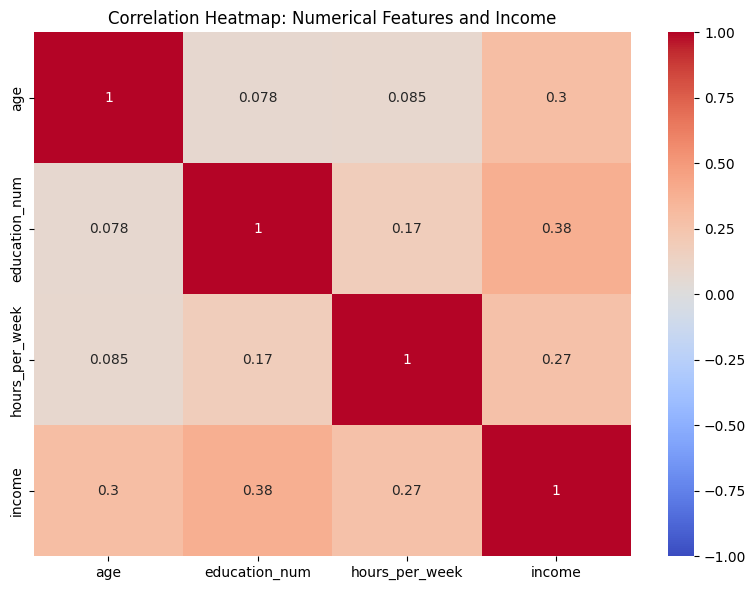

 Heatmap for numerical features saved to E:\AIML_Project\data\processed\heatmap_numerical.png.


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the encoded training dataset
df_train_encoded = pd.read_csv(os.path.join(processed_dir, '(preprocessed_07)adult_train_income_encoded.csv'))

# Define numerical columns to include
numerical_cols = ['age', 'education_num', 'hours_per_week', 'income']

# Verify columns exist and select data
missing_cols = [col for col in numerical_cols if col not in df_train_encoded.columns]
if missing_cols:
    print(f"Warning: Missing columns in dataset: {missing_cols}")
else:
    print("All numerical columns found in dataset.")

df_numerical = df_train_encoded[numerical_cols]

# Check for NaN values or zero variance
print("\nNaN counts per column:")
print(df_numerical.isna().sum())
print("\nVariance per column:")
print(df_numerical.var())

# Compute correlation matrix
corr_matrix = df_numerical.corr()

# Verify matrix shape
print("\nCorrelation matrix shape:", corr_matrix.shape)

# Create heatmap with explicit axis limits
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, xticklabels=True, yticklabels=True)
plt.title('Correlation Heatmap: Numerical Features and Income')
plt.tight_layout()

# Save the heatmap
heatmap_path = os.path.join(processed_dir, 'heatmap_numerical.png')
plt.savefig(heatmap_path)
plt.show()
print(f" Heatmap for numerical features saved to {heatmap_path}.")

In [23]:
#One hot Encoding

#All the nominal column are selected to do one-hot-encoding

# Load the datasets with encoded income
df_train = pd.read_csv(os.path.join(processed_dir, '(preprocessed_07)adult_train_income_encoded.csv'))
df_test = pd.read_csv(os.path.join(processed_dir, '(preprocessed_07)adult_test_income_encoded.csv'))

# Display initial shapes and dtypes
print("Before one-hot encoding:")
print("Training set shape:", df_train.shape)
print("Test set shape:", df_test.shape)
print("\nTraining dtypes:\n", df_train.dtypes)

# Define categorical columns to one-hot encode
categorical_cols = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Apply one-hot encoding to categorical columns
df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

# Convert boolean values to integers (True -> 1, False -> 0)
for column in df_train_encoded.columns:
    if df_train_encoded[column].dtype == 'bool':
        df_train_encoded[column] = df_train_encoded[column].astype(int)
for column in df_test_encoded.columns:
    if df_test_encoded[column].dtype == 'bool':
        df_test_encoded[column] = df_test_encoded[column].astype(int)

# Align test set columns to train set, filling missing with 0
train_columns = df_train_encoded.columns
df_test_encoded = df_test_encoded.reindex(columns=train_columns, fill_value=0)

# Verify shapes and dtypes after encoding
print("\nAfter one-hot encoding:")
print("Training set shape:", df_train_encoded.shape)
print("Test set shape:", df_test_encoded.shape)
print("\nTraining dtypes:\n", df_train_encoded.dtypes)

# Check for non-numeric columns
non_numeric_cols = df_train_encoded.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("\nWarning: Non-numeric columns remain in training set:", non_numeric_cols.tolist())
else:
    print("\nAll columns in training set are numeric.")

# Confirm class balance
print("\nTraining set income distribution:\n", df_train_encoded['income'].value_counts())
print("Test set income distribution:\n", df_test_encoded['income'].value_counts())

# Save fully encoded datasets
df_train_encoded.to_csv(os.path.join(processed_dir, '(preprocessed_08)adult_train_encoded.csv'), index=False)
df_test_encoded.to_csv(os.path.join(processed_dir, '(preprocessed_08)adult_test_encoded.csv'), index=False)
print("\nSaved fully encoded datasets to processed directory.")

Before one-hot encoding:
Training set shape: (15016, 11)
Test set shape: (7400, 11)

Training dtypes:
 age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
hours_per_week     int64
native_country    object
income             int64
dtype: object

After one-hot encoding:
Training set shape: (15016, 79)
Test set shape: (7400, 79)

Training dtypes:
 age                               int64
education_num                     int64
hours_per_week                    int64
income                            int64
workclass_Local-gov               int64
                                  ...  
native_country_Thailand           int64
native_country_Trinadad&Tobago    int64
native_country_United-States      int64
native_country_Vietnam            int64
native_country_Yugoslavia         int64
Length: 79, dtype: object

All columns in training set are numeri

In [24]:
from sklearn.preprocessing import StandardScaler

#Load the fully encoded datasets
df_train_encoded = pd.read_csv(os.path.join(processed_dir, '(preprocessed_08)adult_train_encoded.csv'))
df_test_encoded = pd.read_csv(os.path.join(processed_dir, '(preprocessed_08)adult_test_encoded.csv'))

# Display initial statistics
print("Before scaling:")
print("Training set shape:", df_train_encoded.shape)
print("Test set shape:", df_test_encoded.shape)
print("\nTraining set numerical column stats:")
print(df_train_encoded[['age', 'education_num', 'hours_per_week']].describe())

# Define columns to scale
columns_to_scale = ['age', 'education_num', 'hours_per_week']

# Initialize and fit the StandardScaler on training data
scaler = StandardScaler()
df_train_encoded[columns_to_scale] = scaler.fit_transform(df_train_encoded[columns_to_scale])

# Transform the test data using the same scaler
df_test_encoded[columns_to_scale] = scaler.transform(df_test_encoded[columns_to_scale])

# Verify scaling
print("\nAfter scaling:")
print("Training set shape:", df_train_encoded.shape)
print("Test set shape:", df_test_encoded.shape)
print("\nTraining set numerical column stats:")
print(df_train_encoded[['age', 'education_num', 'hours_per_week']].describe())

# Check dtypes to ensure no issues
print("\nTraining dtypes:\n", df_train_encoded.dtypes)

# Save scaled datasets
df_train_encoded.to_csv(os.path.join(processed_dir, '(preprocessed_09)adult_train_scaled.csv'), index=False)
df_test_encoded.to_csv(os.path.join(processed_dir, '(preprocessed_09)adult_test_scaled.csv'), index=False)
print("\nSaved scaled datasets to processed directory.")

Before scaling:
Training set shape: (15016, 79)
Test set shape: (7400, 79)

Training set numerical column stats:
                age  education_num  hours_per_week
count  15016.000000   15016.000000    15016.000000
mean      40.268913      10.611681       42.516249
std       12.476888       2.596685       11.863442
min       17.000000       1.000000        1.000000
25%       31.000000       9.000000       40.000000
50%       40.000000      10.000000       40.000000
75%       49.000000      13.000000       50.000000
max       90.000000      16.000000       99.000000

After scaling:
Training set shape: (15016, 79)
Test set shape: (7400, 79)

Training set numerical column stats:
                age  education_num  hours_per_week
count  1.501600e+04   1.501600e+04    1.501600e+04
mean  -9.037937e-17   1.343861e-16    1.301274e-16
std    1.000033e+00   1.000033e+00    1.000033e+00
min   -1.865023e+00  -3.701643e+00   -3.499628e+00
25%   -7.429114e-01  -6.206894e-01   -2.121082e-01
50%   -2.